In [0]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [0]:
import numpy as np
import pandas as pd

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1-gLijjiaOB67hKwBjaC3XHnFfDEhnmbO' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Action Words Model.ipynb, id: 1Xcc2no2dO4S6ZBWLLdaHxLYtgd8vFxjM
title: data_words_condensed, id: 1VFJL74iLFlhQoMHXFe4TbRBtsu1XtvWN
title: I Love Experiments.ipynb, id: 1Dr1jbwIlBtK_J9zVLW3UVyCvgwbSHBma
title: data_word_sets, id: 19b-aCTixix3zG3BJfUGJDCMEqVnSq-gl
title: 100000-186279.csv, id: 1ayCuvsORhBuRvK27Ww75MOjOL5GPCQyn
title: 5k_track_uri.csv, id: 1baInF7-V2JPtiwCTJlqgOcZ4f9XYenyx
title: clean_data_nvc, id: 1b-wBP8KQyqxIKOreF9Jno_kqAEg0TBv3
title: clean_data, id: 1XTevK8uvb-Jsk5s9rzjqCnfhVMIe0p5Q
title: 0-99999.csv, id: 11ePJLA1LaZpJ_29u_OBVjYaMdq5Nxch8


In [0]:
data_downloaded = drive.CreateFile({'id': '11ePJLA1LaZpJ_29u_OBVjYaMdq5Nxch8'})
data_downloaded.GetContentFile('0-99999.csv')

In [0]:
data_downloaded = drive.CreateFile({'id': '1ayCuvsORhBuRvK27Ww75MOjOL5GPCQyn'})
data_downloaded.GetContentFile('100000-186279.csv')

In [0]:
data_downloaded = drive.CreateFile({'id': '1XTevK8uvb-Jsk5s9rzjqCnfhVMIe0p5Q'})
data_downloaded.GetContentFile('clean_data')

In [0]:
data_downloaded = drive.CreateFile({'id': '1b-wBP8KQyqxIKOreF9Jno_kqAEg0TBv3'})
data_downloaded.GetContentFile('clean_data_nvc')

In [0]:
data_downloaded = drive.CreateFile({'id': '1baInF7-V2JPtiwCTJlqgOcZ4f9XYenyx'})
data_downloaded.GetContentFile('5k_track_uri.csv')

In [0]:
ls

0-99999.csv       clean_data      datalab/
5k_track_uri.csv  clean_data_nvc  track_uri.csv


### Sub: Geting all rows in order

In [0]:
data1 = pd.read_csv('5k_track_uri.csv')
print(data1.shape)
data1.head(3)

(108870, 6)


,artist,pid,title,uri,csv_id,artist_uri
0,missy elliott,0,lose control feat ciara & fat man scoop,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0,spotify:artist:2wIVse2owClT7go1WT98tk
1,britney spears,0,toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,1,spotify:artist:26dSoYclwsYLMAKD3tpOr4
2,beyoncé,0,crazy in love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,2,spotify:artist:6vWDO969PvNqNYHIOW5v0m


In [0]:
data1.tail(3)

,artist,pid,title,uri,csv_id,artist_uri
108867,solas,4999,crested hens,spotify:track:4aAmDp1AR1Fp1UCpWuvy2d,108867,spotify:artist:2CGGUtRYybRjQmuUwXugeP
108868,kim yoon,4999,moonlight waltz,spotify:track:25JRhSij3kxAJ1li9lPe5k,108868,spotify:artist:2wA50FpX5Yc5b4OrhdQVXP
108869,the stage door orchestra & singers,4999,and then i kissed him,spotify:track:23Ktd7FBxHtP4F1llGMjOe,108869,spotify:artist:4rqD97trg8OUPyHKFRzA8m


In [0]:
del data1

In [0]:
data2 = pd.read_csv('100000-186279.csv')
data2.shape

(86280, 8)

In [0]:
data2.loc[data2['song'] == 'and then i kissed him']

,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
7681,and then i kissed him,the stage door orchestra & singers,-1,NaN,NaN,NaN,NaN,NaN


In [0]:
data3 = data2[:7682].copy()
print(data3.shape)
data3.tail() # -- This is one part of data
del data2

(7682, 8)


In [0]:
data = pd.read_csv('0-99999.csv')
data.shape

(100000, 9)

In [0]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.rename(index=str, columns={"spotify_id": "genius_id"})
print(data.shape)
data.head() # -- This is other part of data

(100000, 8)


,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"\nAnother classic Missy Elliott banger, centre...",NaN,NaN,Sampled from “Body Work” by Hot Streakhttp://w...
1,toxic,britney spears,0,110982.0,\nAppreciating Britney Spears was the final fr...,\nIn 2003 Brit told MTV:\n“It’s basically abou...,Was 'Toxic' offered to anyone else before Brit...,"Before making the video of “Cry Me a River”, J..."
2,crazy in love,beyoncé,0,32167.0,\n“Crazy In Love” is the ridiculously successf...,NaN,NaN,Beyonce is trying to depict in words her abili...
3,rock your body,justin timberlake,0,124611.0,\n“Rock Your Body” is the third single from Ju...,NaN,NaN,"Justin Timberlake is obviously a good dancer, ..."
4,it wasn't me,shaggy,0,33108.0,\nThe idea for this song was inspired by a bit...,NaN,NaN,RikRok needs some guidance because he’s in som...


In [0]:
# Joining all data

data = data.append(data3)
print(data.shape)

(107682, 8)


In [0]:
# del df_full

### 1. Clean above data a little bit

In [0]:
import unicodedata

def normalize_caseless(text):
    res = text
    try:
        res = unicodedata.normalize("NFKD", text.casefold())
    except:
        # print(text)
        res = text
    return res

def caseless_equal(left, right):
    return normalize_caseless(left) == normalize_caseless(right)

In [0]:
# Converting all to lower case
data['about'] = data['about'].apply(lambda x: normalize_caseless(x))
data['artist_speak'] = data['artist_speak'].apply(lambda x: normalize_caseless(x))
data['trivia'] = data['trivia'].apply(lambda x: normalize_caseless(x))
data['annotation'] = data['annotation'].apply(lambda x: normalize_caseless(x))
data.shape

# Stripping away all punctuations

(107682, 8)

In [0]:
data.head(3)

,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"\nanother classic missy elliott banger, centre...",NaN,NaN,sampled from “body work” by hot streakhttp://w...
1,toxic,britney spears,0,110982.0,\nappreciating britney spears was the final fr...,\nin 2003 brit told mtv:\n“it’s basically abou...,was 'toxic' offered to anyone else before brit...,"before making the video of “cry me a river”, j..."
2,crazy in love,beyoncé,0,32167.0,\n“crazy in love” is the ridiculously successf...,NaN,NaN,beyonce is trying to depict in words her abili...


In [0]:
import string
# s.translate(string.punctuation)
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
# s.rstrip()
# line = re.sub('foo','bar', line.rstrip())

def clean(s):
    filters = '''!#+*-–;,.:'"\/?@()'''
    noFilterHit = ""
    try:    
        for char in s:  # Removes \n
            if char not in filters:
                noFilterHit = noFilterHit + char
        noFilterHit = noFilterHit.replace('\n', ' ')
        noFilterHit = noFilterHit.strip()
    except:
        noFilterHit = s
    return noFilterHit
    # print(noFilterHit)

In [0]:
# REMOVING ALL PUNCTUATIONS
data['about'] = data['about'].apply(lambda x: clean(x))
data['artist_speak'] = data['artist_speak'].apply(lambda x: clean(x))
data['trivia'] = data['trivia'].apply(lambda x: clean(x))
data['annotation'] = data['annotation'].apply(lambda x: clean(x))

In [0]:
data.head(3)

,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,another classic missy elliott banger centred a...,NaN,NaN,sampled from “body work” by hot streakhttpwwwy...
1,toxic,britney spears,0,110982.0,appreciating britney spears was the final fron...,in 2003 brit told mtv “it’s basically about a ...,was toxic offered to anyone else before britne...,before making the video of “cry me a river” ju...
2,crazy in love,beyoncé,0,32167.0,“crazy in love” is the ridiculously successful...,NaN,NaN,beyonce is trying to depict in words her abili...


In [0]:
# np.array(data['about'][:5])  # YT links left to remove

### 2. Basic EDA

In [0]:
# Finding number of values present
full = data.shape[0]

how_many_about = full - data['about'].isnull().values.sum()
how_many_artist_speak = full - data['artist_speak'].isnull().values.sum()
how_many_trivia = full - data['trivia'].isnull().values.sum()
how_many_annotation = full - data['annotation'].isnull().values.sum()
print(how_many_about, how_many_artist_speak, how_many_trivia, how_many_annotation)

# About and annotation are worth considering, rest can be combined/removed.

76388 6966 1603 33900


In [0]:
all_are_null = data.isnull().all(axis=1).values.sum()
print(all_are_null)

# All entries have atleast one non-null field

0


### 3. Improved LDA to classify into one of pre-defined topics

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [0]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
print(stop) 
print(exclude)
print(lemma)

{'again', 'have', 'their', "didn't", 'did', "couldn't", 'nor', 'what', 'hadn', 'ain', 'further', "weren't", 'itself', 'an', 'that', 'just', 'hers', 'her', 'own', 'both', "that'll", "it's", 's', 'under', 'the', 'won', 'isn', 'being', 'why', 'ourselves', 'theirs', 'doesn', 'my', 'herself', "don't", 'shan', "hadn't", 'before', 'having', 'these', "shan't", 'until', 'its', 'were', 'am', 'most', 'down', 'if', 'himself', 'then', 'no', 'they', 'through', "you've", 'weren', "you'll", 'm', 'once', 'didn', 'mightn', 'to', 'ours', 'does', 'for', 'of', "haven't", 'themselves', 'in', 'doing', 'very', 'here', 'because', 'off', "she's", 'after', 'but', 'o', 'yourself', 'between', 'hasn', 'couldn', 'be', 'had', 'not', 't', 'so', 'now', "wasn't", "doesn't", "hasn't", 'only', "you're", 'haven', 'same', 'he', 'on', "should've", 'each', 'those', 'myself', 'you', 'do', 'below', 'our', 'this', 'some', 'which', 'mustn', "needn't", 'who', 'me', 'yours', 'it', 'can', 'while', 'is', 'any', 'wasn', 'where', 'out'

In [0]:
# Create a list of words
def gimme_words(s):
    try:
        final_words = []
        words = s.split()
        i = 0
        total_len = len(words)
        while i<total_len:
            if words[i][0]=='“' and words[i][-1]=='”':
                final_words.append(words[i])
                i+=1
            elif words[i][0]=='“':
                new_word = words[i]
                start = i
                i+=1
                while i<total_len:
                    if words[i][-1]=='”':
                        new_word+=' '+words[i]
                        end = i
                        i+=1
                        break
                    else:
                        new_word+=' '+words[i]
                        i+=1
                final_words.append(new_word)
            else:
                final_words.append(words[i])
                i+=1
        return final_words
    except:
        return []

def lda_clean(doc):
    try:
        doc = doc.replace('’', '\'')
        words1 = gimme_words(doc)
        # print(words1)
        stop_free = " ".join([i for i in words1 if i not in stop])
        # print(stop_free)
        punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
        # print(punc_free)
        words2 = gimme_words(punc_free)
        # print(words2)
        normalized = " ".join(lemma.lemmatize(word) for word in words2)
        # print(normalized)
        return normalized
    except:
      # raise ValueError('What')
        return doc

In [0]:
temp = lda_clean(data['about'][1])
temp

'second track 1996 album tidal according fiona interview cmj new music magazine “sullen girl is complicated for me its about a lot of things its about when i was doing the album and everything was happening all at once and i just felt like ‘oh my god whats going on here the second verse is a i went through a really hard time when i was a very very cold person i didnt like to be near people when i was 12 i was raped by a stranger and thats what this song is basically about because i felt like everybody in my life thought there was something wrong with me and it was just my wondering ‘was that what changed me that was an experience that made me a lot stronger it taught me a lot about who i am and life things happen and you go through pain it doesnt have to be such a big deal its like ‘yeah i was raped its over though and i learned from it its sad but good thing come out of it too”'

In [0]:
# LDA Cleaning
data['about'] = data['about'].apply(lambda x: lda_clean(x))
data['artist_speak'] = data['artist_speak'].apply(lambda x: lda_clean(x))
data['trivia'] = data['trivia'].apply(lambda x: lda_clean(x))
data['annotation'] = data['annotation'].apply(lambda x: lda_clean(x))

In [0]:
# LDA Cleaning
data['about'] = data['about'].apply(lambda x: gimme_words(x))
data['artist_speak'] = data['artist_speak'].apply(lambda x: gimme_words(x))
data['trivia'] = data['trivia'].apply(lambda x: gimme_words(x))
data['annotation'] = data['annotation'].apply(lambda x: gimme_words(x))

In [0]:
def make_set(lst):
  return set(lst)


# LDA Cleaning
data['about'] = data['about'].apply(lambda x: make_set(x))
data['artist_speak'] = data['artist_speak'].apply(lambda x: make_set(x))
data['trivia'] = data['trivia'].apply(lambda x: make_set(x))
data['annotation'] = data['annotation'].apply(lambda x: make_set(x))

In [0]:
print(data.shape)
data.head(3)

(107682, 8)


,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{streak, number, cybotrons, engaging, floor, b...",{},{},"{heard, pretty, really, throughout, whole, lin..."
1,toxic,britney spears,0,110982.0,"{surfguitar, shedding, throttled, red, sexuali...","{brit, mtv, 2003, “its basically about a girl ...","{song, revealed, toxic, recorded, yes, intervi...","{carnal, back, people, reflects, tire, little,..."
2,crazy in love,beyoncé,0,32167.0,"{time, chicago, “crazy in love”, second, album...",{},{},"{number, jehovah, therefore, yall, smoke, peop..."


In [0]:
# Storing the dataframe

import pickle
with open("data_word_sets", "wb") as fp:
  pickle.dump(data, fp)

In [0]:
uploaded = drive.CreateFile({'title': 'data_word_sets'})
uploaded.SetContentFile('data_word_sets')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 19b-aCTixix3zG3BJfUGJDCMEqVnSq-gl


In [0]:
ls

0-99999.csv        clean_data      data_word_sets
100000-186279.csv  clean_data_nvc  nltk_data/
5k_track_uri.csv   datalab/        track_uri.csv


### Sub: Loading word sets from pickle and into dataframe

In [0]:
data_downloaded = drive.CreateFile({'id': '19b-aCTixix3zG3BJfUGJDCMEqVnSq-gl'})
data_downloaded.GetContentFile('data_word_sets')

In [0]:
!ls

# DO HERE

0-99999.csv	   clean_data	   data_word_sets
100000-186279.csv  clean_data_nvc  nltk_data
5k_track_uri.csv   datalab	   track_uri.csv


In [0]:
import pickle 

with open("data_word_sets", "rb") as fp:   # Unpickling
  data_word_sets = pickle.load(fp)

In [0]:
import pandas as pd
import numpy as np

data_word_sets.head()

,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{engaging, dance, floor, control, around, char...",{},{},"{powerful, track, really, elliots, world, song..."
1,toxic,britney spears,0,110982.0,"{sure, red, punctuation, producer, matter, mis...","{2003, brit, “its basically about a girl addic...","{happens, song, interview, revealed, yes, cohe...","{two, stating, contra, drug, romantic, like, l..."
2,crazy in love,beyoncé,0,32167.0,"{beyoncés, time, group, lead, collaborative, ...",{},{},"{stating, roc, “part ii on the run”, term, ask..."
3,rock your body,justin timberlake,0,124611.0,"{xxxviii, invincible, took, pharrell, solo, re...",{},{},"{true, parody, club, ladieshes, story, explici..."
4,it wasn't me,shaggy,0,33108.0,"{open, became, recording, said, story, like, d...",{},{},"{usagehttpwwwyoutubecomwatchvuf6qfbqd9uthe, se..."


### Sub: Condensing words

In [0]:
def merge_all(row):
  words = set()
  words = words.union(row['about'])
  words = words.union(row['artist_speak'])  
  words = words.union(row['trivia'])    
  words = words.union(row['annotation'])    
  return words

In [0]:
# Merge columns
set_1 = {'a', 'b'}
set_b = {'b', 'd'}
set_c = {}
set_1.union(set_b)
set_1.union(set_c)

{'a', 'b'}

In [0]:
df = pd.DataFrame({'Year': [{'2014', '2013'}, {'2015','2013'}], 'quarter': [{'q1','q3'}, {'q2','q3'}]})
df['new_new_col'] = ''
df['new_new_col'] = df['new_new_col'].apply(set)
df

,Year,quarter,new_new_col
0,"{2013, 2014}","{q3, q1}",{}
1,"{2015, 2013}","{q2, q3}",{}


In [0]:
# def merge_all_temp(row):
#   words = set()
#   words = words.union(row['Year'])
#   words = words.union(row['quarter'])
#   return words

In [0]:
df['new_new_col'] = df.apply(lambda row: merge_all_temp(row), axis=1)
df

,Year,quarter,new_new_col
0,"{2013, 2014}","{q3, q1}","{q3, 2013, 2014, q1}"
1,"{2015, 2013}","{q2, q3}","{q3, 2015, q2, 2013}"


In [0]:
data_word_sets['words'] = ''
data_word_sets['words'] = data_word_sets['words'].apply(set)

data_word_sets['words'] = data_word_sets.apply(lambda row: merge_all(row), axis=1)
data_word_sets.head(3)

,song,artist,query_id,genius_id,about,artist_speak,trivia,annotation,words
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{engaging, dance, floor, control, around, char...",{},{},"{powerful, track, really, elliots, world, song...","{engaging, floor, really, around, bunch, world..."
1,toxic,britney spears,0,110982.0,"{sure, red, punctuation, producer, matter, mis...","{2003, brit, “its basically about a girl addic...","{happens, song, interview, revealed, yes, cohe...","{two, stating, contra, drug, romantic, like, l...","{two, stating, matter, contra, mysteriously, r..."
2,crazy in love,beyoncé,0,32167.0,"{beyoncés, time, group, lead, collaborative, ...",{},{},"{stating, roc, “part ii on the run”, term, ask...","{stating, term, ask, television, puff, rythm, ..."


In [0]:
# Delete the rest
data_word_sets = data_word_sets.drop(['about','artist_speak','trivia','annotation'], axis = 1)
data_word_sets.head(3)

,song,artist,query_id,genius_id,words
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{engaging, floor, really, around, bunch, world..."
1,toxic,britney spears,0,110982.0,"{two, stating, matter, contra, mysteriously, r..."
2,crazy in love,beyoncé,0,32167.0,"{stating, term, ask, television, puff, rythm, ..."


In [0]:
# Storing the dataframe

import pickle
with open("data_words_condensed", "wb") as fp:
  pickle.dump(data_word_sets, fp)
  
uploaded = drive.CreateFile({'title': 'data_words_condensed'})
uploaded.SetContentFile('data_words_condensed')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1VFJL74iLFlhQoMHXFe4TbRBtsu1XtvWN


### Sub: Find action and description words

In [0]:
ls

0-99999.csv        clean_data      data_words_condensed  track_uri.csv
100000-186279.csv  clean_data_nvc  data_word_sets
5k_track_uri.csv   datalab/        nltk_data/


In [0]:
# data_downloaded = drive.CreateFile({'id': '1VFJL74iLFlhQoMHXFe4TbRBtsu1XtvWN'})
# data_downloaded.GetContentFile('data_words_condensed')

In [0]:
import pickle 

with open("data_words_condensed", "rb") as fp:   # Unpickling
  data_words_condensed = pickle.load(fp)

In [0]:
print(data_words_condensed.shape)
data_words_condensed.head(3)

(107682, 5)


,song,artist,query_id,genius_id,words
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{ciara, engaging, powerful, track, dance, cont..."
1,toxic,britney spears,0,110982.0,"{two, stating, matter, contra, mysteriously, d..."
2,crazy in love,beyoncé,0,32167.0,"{stating, roc, beyoncés, “part ii on the run”..."


In [0]:
data_words_condensed['one_hot'] = ''
data_words_condensed['one_hot'] = data_words_condensed['one_hot'].apply(list)

In [0]:
data_words_condensed.head(3)

,song,artist,query_id,genius_id,words,one_hot
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{ciara, engaging, powerful, track, dance, cont...",[]
1,toxic,britney spears,0,110982.0,"{two, stating, matter, contra, mysteriously, d...",[]
2,crazy in love,beyoncé,0,32167.0,"{stating, roc, beyoncés, “part ii on the run”...",[]


In [0]:
# types of playlists
top = {'work' : ['work', 'go', 'hard', 'strong', 'boss'],
       'workout' : ['jump', 'workout', 'rise', 'power'],
       'dinner': ['eating', 'drinking', 'dinner', 'lunch', 'breakfast', 'food', 'wine', 'soda'],
       'drive': ['driving', 'road', 'riding', 'car', 'plane', 'fly', 'swim', 'ship', 
                 'travel', 'flying', 'swimming', 'drive', 'ride', 'journey'],
       'dance' : ['dance', 'choreograph', 'choreo', 'dancing', 'beat', 'disco'],
       'classics' : ['guitar', 'solo', 'billboard', 'beautiful', 'rock', 'guitarist', 
                     'truth', 'nirvana', 'beauty', 'bohemian', 'sweet', 'feeling', 'tale', 
                     'zeppelin', 'beatles', 'clapton', 'angel', 'rhythm', 'remastered'],
       'teen' : ['love', 'girl', 'boy', 'makeup', 'lip', 'gloss', 'lipstick', 'bubblegum', 
                 'me', 'you', 'baby', 'party', 'prom', 'miley', 'doll', 'boi', 'demi', 'selena', 
                 'justin', 'jonas', 'britney', 'pop', 'katy', 'bts', 'kpop', 'avril', 'ariana'],
       'dark' : ['die', 'hate', 'devil', 'evil', 'bone', 'blood'],
       'rnb' : ['shawty', 'nigga', 'fuck', 'shit', 'money', 'smack', 'die', 'kanye', 'minaj', 'rap'],
       'happy': ['happy', 'singing', 'laughing', 'laugh', 'laughter', 'cheer', 'rainbow', 'romance', 'bright', 'sparkle', 'shine', 'angel'],
       'breakup' : ['single', 'myself', 'sad', 'angry', 'tears', 'alone', 'pain', 'suffering', 'hurt', 'cheat'],
       'rebel' : ['limelight', 'money', 'angry', 'rebel', 'power', 'powerful', 'strong', 'pain'],
       'festival' : ['christmas', 'gifts', 'santa', 'bells', 'lights'],
       'worship' : ['pray', 'praying', 'god', 'almighty', 'saint', 'heaven', 'keys to the kingdom', 'holy', 'bible', 'christ'],
       'foreign' : ['el','les']}

In [0]:
a = set()
'a' in a

False

In [0]:
def find_types(st):
  num_types = len(top.keys())
  one_hot = [1]*num_types
  # print(st)
  for i,key in enumerate(top.keys()):
    terms = top[key]
    for t in terms:
      if t in st: 
        # print(t, key)
        one_hot[i] += 1
  return one_hot

In [0]:
def is_type(lst, type_str):
  idx = list(top.keys()).index(type_str)
  if lst[idx]>0:
    return True
  return False

In [0]:
def type_count(lst, type_str):
  idx = list(top.keys()).index(type_str)
  return lst[idx]

In [0]:
# Testing one hot
# df = data_words_condensed.copy()
data_words_condensed['one_hot'] = data_words_condensed['words'].apply(lambda x: find_types(x))

In [0]:
# df.head(3)
data_words_condensed.head(3)

,song,artist,query_id,genius_id,words,one_hot
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{ciara, engaging, powerful, track, dance, cont...","[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]"
1,toxic,britney spears,0,110982.0,"{two, stating, matter, contra, mysteriously, d...","[2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 4, 2, 1, 1, 1]"
2,crazy in love,beyoncé,0,32167.0,"{stating, roc, beyoncés, “part ii on the run”...","[1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1]"


In [0]:
# Storing the dataframe

import pickle
with open("data_words_one_hot.pkl", "wb") as fp:
  pickle.dump(data_words_condensed, fp)
  
uploaded = drive.CreateFile({'title': 'data_words_one_hot.pkl'})
uploaded.SetContentFile('data_words_one_hot.pkl')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1y8MZm4MnCh88_6bEeh3bWx-J6gKEy8f6


In [0]:
import pickle 

with open("data_words_one_hot.pkl", "rb") as fp:   # Unpickling
  data_words_one_hot = pickle.load(fp)
  
data_words_one_hot.head(3)

,song,artist,query_id,genius_id,words,one_hot
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{engaging, powerful, dance, track, control, re...","[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]"
1,toxic,britney spears,0,110982.0,"{two, stating, contra, matter, mysteriously, d...","[2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 4, 2, 1, 1, 1]"
2,crazy in love,beyoncé,0,32167.0,"{stating, beyoncés, roc, “part ii on the run”...","[1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1]"


In [0]:
top.keys()

dict_keys(['work', 'workout', 'dinner', 'drive', 'dance', 'classics', 'teen', 'dark', 'rnb', 'happy', 'breakup', 'rebel', 'festival', 'worship', 'foreign'])

In [0]:
df['type_count'] = df['one_hot'].apply(lambda x: type_count(x, 'foreign'))
df.sort_values(['type_count'], ascending = False)[:30]

,song,artist,query_id,genius_id,words,one_hot,type_count
94032,bill murray,gorillaz,0,1930094.0,"{mythos, guitarist, time, eight, ‘too, murray,...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]",1
96720,jeremías 17-5,canserbero,0,92740.0,"{decide, metia, solo, esas, song, hacia, tambi...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1
96744,luzbel,arce,0,748954.0,"{ganar, no, neuronas, ha, pensar, eso, sanaarc...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]",1
96742,love,juancho marqués,0,3299506.0,"{sea, hora, que, el, con, paso, estupido, esa,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1
95008,the book of my life,sting,0,390108.0,"{said“i, attempt, religion, page, fire, el, re...","[0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1]",1
76410,si señor,control machete,0,146808.0,"{estas, logrado, sus, líneas, el, “el olor de...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1
96733,loco,la banda baston,0,2982977.0,"{mafiael, eso, encuentra, estos, jehová, muy,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1
96731,no me porto bien,la banda baston,0,2404983.0,"{pesadillas, club, anime, eso, poseía, hosped...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]",1
96730,me gustas,la banda baston,0,247658.0,"{que, el, claras, haya, artista, con, qui, un,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1
96726,tentación,agorazein,0,2899966.0,"{su, caracteriza, que, el, ha, estilo, tanta, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",1


In [0]:
type(df['one_hot'][0])

list

In [0]:
temp = df['one_hot'].apply(lambda x: which_type(x, 'teen'))
df[temp]

,song,artist,query_id,genius_id,words,one_hot,type_count
1,toxic,britney spears,0,110982.0,"{two, stating, matter, contra, mysteriously, d...","[1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 1, 0, 0, 0]",0
2,crazy in love,beyoncé,0,32167.0,"{stating, roc, beyoncés, “part ii on the run”...","[0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0]",0
3,rock your body,justin timberlake,0,124611.0,"{true, parody, club, ladieshes, story, explici...","[1, 0, 0, 0, 3, 2, 5, 0, 1, 1, 1, 0, 0, 0, 0]",0
4,it wasn't me,shaggy,0,33108.0,"{open, usagehttpwwwyoutubecomwatchvuf6qfbqd9ut...","[0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 0]",0
5,yeah!,usher,0,148.0,"{two, signature, suit, “get low”, club, clothi...","[1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]",0
6,my boo,usher,0,59639.0,"{two, became, rozonda, back—they, 2002, matter...","[2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0]",0
7,buttons,the pussycat dolls,0,32118.0,"{two, thxhe, melody, sutta, annotation, 100, p...","[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0]",0
8,say my name,destiny's child,0,140800.0,"{two, farrah, brother, stuff, toni, punk, part...","[0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0]",0
9,hey ya! - radio mix / club mix,outkast,0,1449.0,"{terrified, true, “hey ya”, stating, said, all...","[1, 0, 1, 1, 2, 1, 3, 0, 2, 2, 2, 1, 0, 0, 0]",0
10,promiscuous,nelly furtado,0,3343.0,"{two, became, stuff, said, knight, club, sang,...","[2, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0]",0


In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
data_word_sets['words'][:5]

0    {heard, number, pretty, cybotrons, engaging, b...
1    {carnal, back, interview, people, tire, reflec...
2    {therefore, yall, put, cancerjayz, compare, va...
3    {debut, displayed, videoconfirmed, learn, arou...
4    {suggests, back, interview, “raw”, 2000, cloth...
Name: words, dtype: object

In [0]:
nltk.pos_tag(data_word_sets.values[0][4]) 

[('heard', 'NN'),
 ('number', 'NN'),
 ('pretty', 'JJ'),
 ('cybotrons', 'NNS'),
 ('engaging', 'VBG'),
 ('banger', 'NN'),
 ('making', 'VBG'),
 ('throughout', 'IN'),
 ('move', 'NN'),
 ('4', 'CD'),
 ('10', 'CD'),
 ('smash', 'NN'),
 ('bambaataaone', 'NN'),
 ('powerful', 'JJ'),
 ('track', 'NN'),
 ('sample', 'NN'),
 ('“clear”', 'NNP'),
 ('elliott', 'NN'),
 ('appears', 'VBZ'),
 ('afrika', 'JJ'),
 ('man', 'NN'),
 ('billboard', 'NN'),
 ('centred', 'VBD'),
 ('extremity', 'NN'),
 ('dance', 'NN'),
 ('“body work”', 'NN'),
 ('song', 'NN'),
 ('3', 'CD'),
 ('026httpswwwyoutubecomwatchvojijgprj0gthe', 'CD'),
 ('music', 'NN'),
 ('technology', 'NN'),
 ('chart', 'NN'),
 ('“planet rock”', 'NNP'),
 ('nickname', 'NN'),
 ('setting', 'VBG'),
 ('elliots', 'NNS'),
 ('control', 'NN'),
 ('streakhttpwwwyoutubecomwatchfeatureplayerembeddedvojijgprj0gt26ssample',
  'JJ'),
 ('scoop', 'NN'),
 ('incredible', 'JJ'),
 ('hiphop', 'NN'),
 ('bunch', 'NN'),
 ('video', 'JJ'),
 ('country', 'NN'),
 ('hot', 'JJ'),
 ('streak', 'NN'

### Sub: Fiding Similarity

In [0]:
seeds = []
for song in ['tentación']:
  score = data_words_condensed[data_words_condensed['song'] == song]['one_hot']
  for s in score:
    seeds.append(s)
seeds

# seed = data_words_condensed[data_words_condensed['song'] == 'tentación']['one_hot']
# seed

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]]

In [0]:
data_words_condensed[(data_words_condensed['song'] == 'somebody to love') & (data_words_condensed['artist'] == 'justin bieber')]#['one_hot']

,song,artist,query_id,genius_id,words,one_hot
41,somebody to love,justin bieber,0,849292.0,"{true, choreographed, stuff, matter, said, met...","[3, 1, 1, 2, 3, 3, 5, 1, 2, 3, 1, 2, 1, 1, 1]"


In [0]:
scores = []
for song in ['somebody to love', 'paper planes', 'persiguiéndonos']:
  score = data_words_condensed[data_words_condensed['song'] == song]['one_hot']
  for s in score:
    scores.append(s)
scores

[[3, 1, 1, 2, 3, 3, 5, 1, 2, 3, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 3, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1],
 [2, 2, 2, 4, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1],
 [2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]]

In [0]:
pool = scores
        # store copy_data_nvs in data folder? get index or id of given song
        # get list of words from lda model/ get weights for topics
        # return

In [0]:
seeds

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]]

In [0]:
from scipy import spatial

output = []
for src in seeds:
  line = [spatial.distance.cosine(src, tgt) for tgt in pool]
  output.append(line)

In [0]:
output

[[0.18307827112316866,
  0.23333333333333328,
  0.026271008879704683,
  0.026271008879704683,
  0.026271008879704683,
  0.12462378093518289,
  0.14079702329489807,
  0.07417990022744836,
  0.026271008879704683,
  0.026271008879704683,
  -2.220446049250313e-16]]

## OTHER STUFF

In [0]:
### OTHER 

In [0]:
more_stops = {'song', 'music', 'lyric', 'also', 'want', 'people', 'get', 'could', 
              'would', 'video', 'track', 'say', 'said', 'reference', 'something', 
              'one', 'many', 'may', 'though', 'hence', 'much', 'single', 'sing', 
              'person', 'chorus', 'melody', 'action', 'feel', 'need', 'thats'}
#               'album', 'band', 'singer', 'studio', 'word', 

def remove_more(lst):
  new_list = []
  new_list.append([l for l in lst if l not in more_stops])
  return new_list[0]
                  
copy_data['about'] = copy_data['about'].apply(lambda x: remove_more(x))
copy_data['artist_speak'] = copy_data['artist_speak'].apply(lambda x: remove_more(x))
copy_data['trivia'] = copy_data['trivia'].apply(lambda x: remove_more(x))
copy_data['annotation'] = copy_data['annotation'].apply(lambda x: remove_more(x))

In [0]:
def select_parts(lst):
  new_list = []
  tags = nltk.pos_tag(lst)
  for tag in tags:
    if tag[1][0] in ['N','J'] or tag[1] == 'CD':
      new_list.append(tag[0])
  return set(new_list)

In [0]:
copy_data['about'] = copy_data['about'].apply(lambda x: select_parts(x))
copy_data['artist_speak'] = copy_data['artist_speak'].apply(lambda x: select_parts(x))
copy_data['trivia'] = copy_data['trivia'].apply(lambda x: select_parts(x))
copy_data['annotation'] = copy_data['annotation'].apply(lambda x: select_parts(x))

In [0]:
copy_data.head()

,song,artist,query_id,spotify_id,about,artist_speak,trivia,annotation
0,lose control (feat. ciara & fat man scoop),missy elliott,1,33158.0,"{futuristic, edge, streak, dancer, hot, album,...",{},{},{cybotronhttpswwwyoutubecomwatchvi280cxs2jvash...
1,toxic,britney spears,0,110982.0,"{husk, pedophilia, drapery, damn, popfearing, ...",{“its basically about a girl addicted to a guy...,"{minogue, cohen, live, interview, watch, andy,...","{saw, turn, simple, romantic, hammer, shell, r..."
2,crazy in love,beyoncé,0,32167.0,"{lead, effort, second, hook, album, collaborat...",{},{},"{suspicious, smoking, bey, maker, use, protago..."
3,rock your body,justin timberlake,0,124611.0,"{“rock your body”, williams, album, performanc...",{},{},"{kind, mila, long, ciara, parody, signal, “sin..."
4,it wasn't me,shaggy,0,33108.0,"{artist, kind, rest, outlandish, paved, disput...",{},{},"{cat, sun, sex”a, various, wife, “how could yo..."


In [0]:
import pickle
with open("clean_data_nvc", "wb") as fp:
  pickle.dump(copy_data, fp)

NameError: ignored

In [0]:
uploaded = drive.CreateFile({'title': 'clean_data_nvc'})
uploaded.SetContentFile('clean_data_nvc')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1b-wBP8KQyqxIKOreF9Jno_kqAEg0TBv3


### Sub: Loading again from pickle

In [0]:
import pickle 

with open("clean_data_nvc", "rb") as fp:   # Unpickling
  copy_data = pickle.load(fp)

In [0]:
copy_data.tail(3)

,song,artist,query_id,spotify_id,about,artist_speak,trivia,annotation
99997,harlequin dreams feat. unknown space pioneer -...,cyberoptics,-1,NaN,{},{},{},{}
99998,crucify,tori amos,0,108015.0,"{drum, mainstream, sacreligious, skill, songbo...",{},{},"{rest, enougha, march, point, mind, shallow, p..."
99999,silent all these years,tori amos,0,108012.0,"{lip, needle, stewart, tina, understood, life,...","{kind, big, silent, know, life, thing, underst...",{},"{noisethis, fail, family, young, dean, vicious..."


In [0]:
# Joining all words

def join_all_words(df):
    full_list = []
    for i in range(df.shape[0]):
        full_list += list(df['about'][i])
        full_list += list(df['artist_speak'][i])
        full_list += list(df['trivia'][i])
        full_list += list(df['annotation'][i])
    return full_list

def join_all_words_differently(df):
    full_list = []
    for i in range(df.shape[0]):
        # print(copy_data['about'][i])
        full_list.append(list(df['about'][i]) + list(df['artist_speak'][i]) + list(df['trivia'][i]) + list(df['annotation'][i]))
    return full_list

# tt = copy_data[:500]
full_list = join_all_words_differently(copy_data)
len(full_list)

100000

In [0]:
### FREQUENCY OF TERMS

full_list_for_eda = join_all_words(copy_data)
len(full_list_for_eda)

3438605

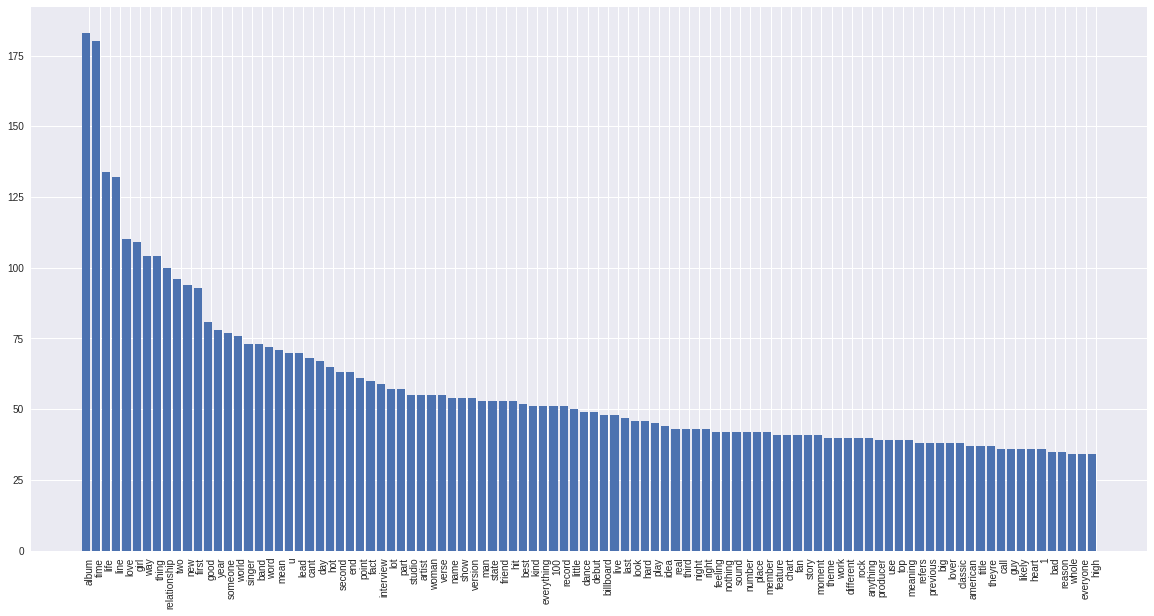

In [0]:
# full_list_for_eda = np.array(full_list_for_eda)
# full_list_for_eda.hist()

from collections import Counter
import matplotlib.pyplot as plt

# counts = Counter(full_list_for_eda) 
counts = dict(Counter(full_list_for_eda).least_common(100))
labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1] # sort your values in descending order

labels = np.array(labels)[indSort] # rearrange your data
values = np.array(values)[indSort]
indexes = np.arange(len(labels))


plt.figure(figsize=(20,10))

bar_width = 0.35
plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels, rotation=90)
plt.show()

In [0]:
!pip install gensim

    100% |████████████████████████████████| 22.6MB 1.8MB/s 
    100% |████████████████████████████████| 1.4MB 14.7MB/s 
    100% |████████████████████████████████| 133kB 22.3MB/s 
    100% |████████████████████████████████| 61kB 16.5MB/s 
    100% |████████████████████████████████| 4.2MB 9.9MB/s 
    100% |████████████████████████████████| 552kB 21.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/b1/9e/7d/bb3d3b55c597e72617140a0638c06382a5f17283881eae163e
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import gensim
from gensim import corpora, models

dictionary = corpora.Dictionary(full_list)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in full_list]

In [0]:
# lda = gensim.models.ldamodel.LdaModel
# ldamodel = lda(doc_term_matrix, num_topics=100, id2word = dictionary, passes=50)

# train LDA using 4 cores (1 master + 3 workers)
lda_model = models.LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=100, passes = 50, workers=3)


In [0]:
print(ldamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.004*"album" + 0.004*"time" + 0.004*"life" + 0.003*"thing" + 0.003*"line" + 0.003*"band" + 0.003*"girl" + 0.002*"way" + 0.002*"relationship" + 0.002*"world"'), (1, '0.005*"time" + 0.004*"line" + 0.004*"album" + 0.003*"two" + 0.003*"life" + 0.003*"first" + 0.003*"hit" + 0.002*"interview" + 0.002*"thing" + 0.002*"love"'), (2, '0.004*"time" + 0.003*"life" + 0.003*"way" + 0.003*"album" + 0.002*"u" + 0.002*"relationship" + 0.002*"world" + 0.002*"someone" + 0.002*"end" + 0.002*"line"'), (3, '0.003*"thing" + 0.003*"world" + 0.003*"line" + 0.003*"way" + 0.003*"kind" + 0.002*"mean" + 0.002*"time" + 0.002*"word" + 0.002*"love" + 0.002*"money"'), (4, '0.004*"time" + 0.003*"album" + 0.003*"100" + 0.003*"life" + 0.003*"girl" + 0.003*"love" + 0.003*"relationship" + 0.003*"billboard" + 0.003*"part" + 0.003*"two"'), (5, '0.007*"album" + 0.004*"girl" + 0.003*"line" + 0.003*"life" + 0.003*"time" + 0.003*"hot" + 0.003*"word" + 0.003*"feature" + 0.003*"studio" + 0.003*"dance"'), (6, '0.005*"album" 

### 4. Classifying song emotion into 5-6 categories 

### 5. Seeing how good genre classification is based on song annotations

### 6. Extracting some keywords at song and playlist levels